In [1]:
#data: time series of milk production over 13 years
import pandas as pd
data = pd.read_csv('time_data\\cow.csv')

In [2]:
data.head()

,Month,production
0,1962-01,589
1,1962-02,561
2,1962-03,640
3,1962-04,656
4,1962-05,727


In [3]:
data.describe()

,production
count,168.000000
mean,754.708333
std,102.204524
min,553.000000
25%,677.750000
50%,761.000000
75%,824.500000
max,969.000000


# check for outliers and trends

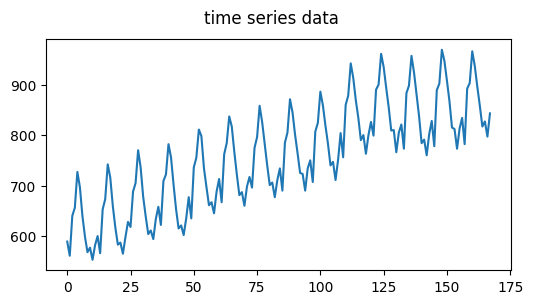

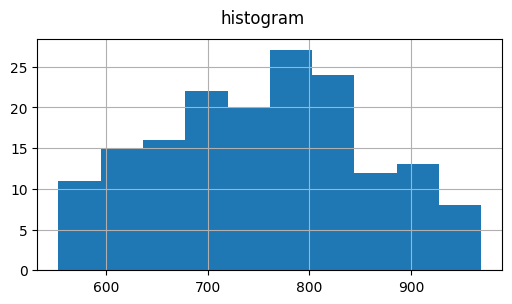

In [4]:
#check for outliers & trends
# Let us create a line plot to check for outliers &trends and 
# if there is a trend then whether the trend appears to be level around the mean.
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(6,3))
fig.suptitle('time series data')
data.production.plot(ax=ax)
plt.show()

fig, ax = plt.subplots(figsize=(6,3))
fig.suptitle('histogram')
data.production.hist(ax=ax)
plt.show()

In [5]:
# Histograms were made to check if the distribution is Gaussian & from what we can see, 
# it looks like this this is not a Gaussian distribution. Moreover it has a left shift.

# time series decomposition (econometrics5 pg.91)

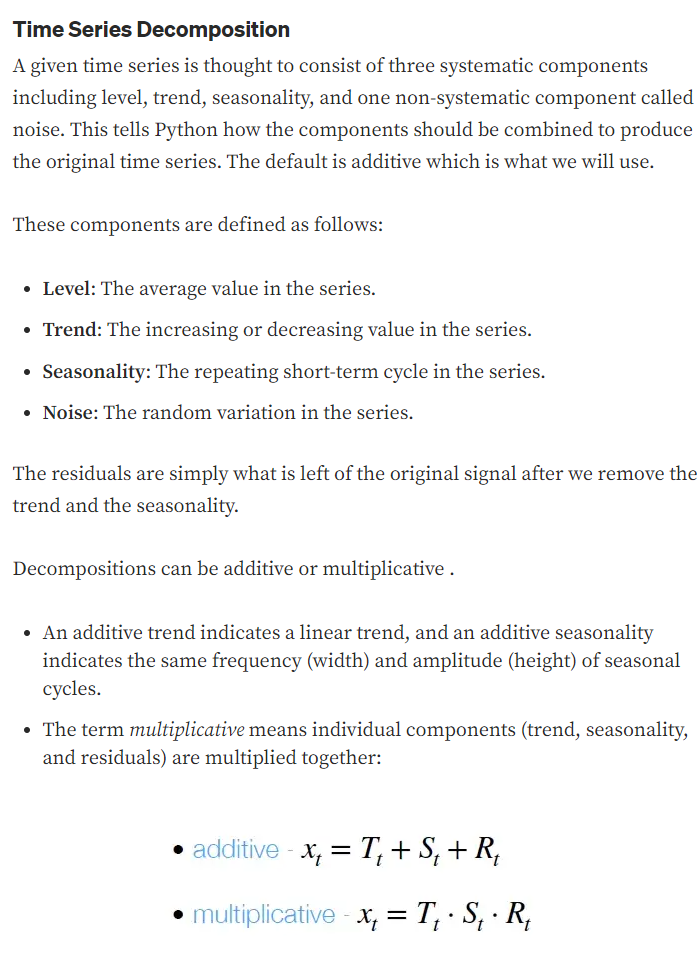

In [6]:
from IPython.display import Image
Image('images\\10.png')

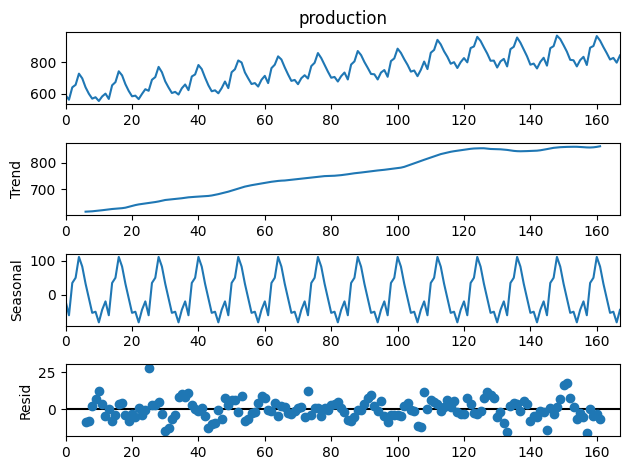

In [7]:
#Decomposition
import statsmodels.tsa.api as smt
decomp = smt.seasonal_decompose(data.production, model='additive', period=12)
decomp.plot()
plt.show()
# seasonality confirmed

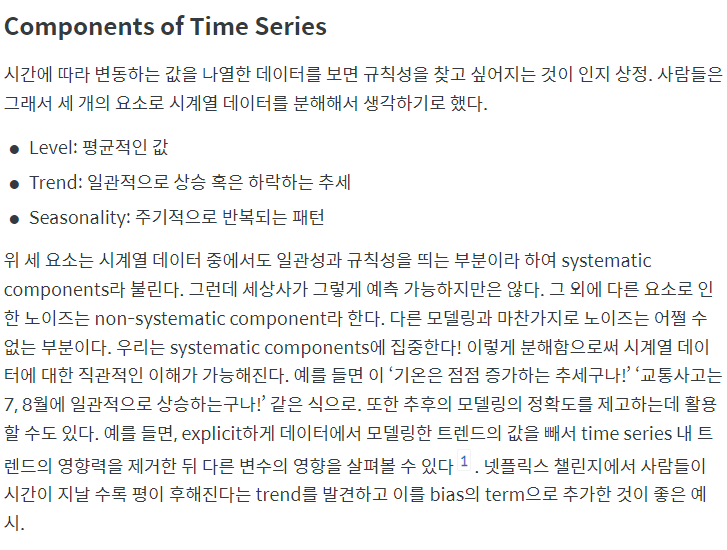

In [8]:
Image('images\\14.png')

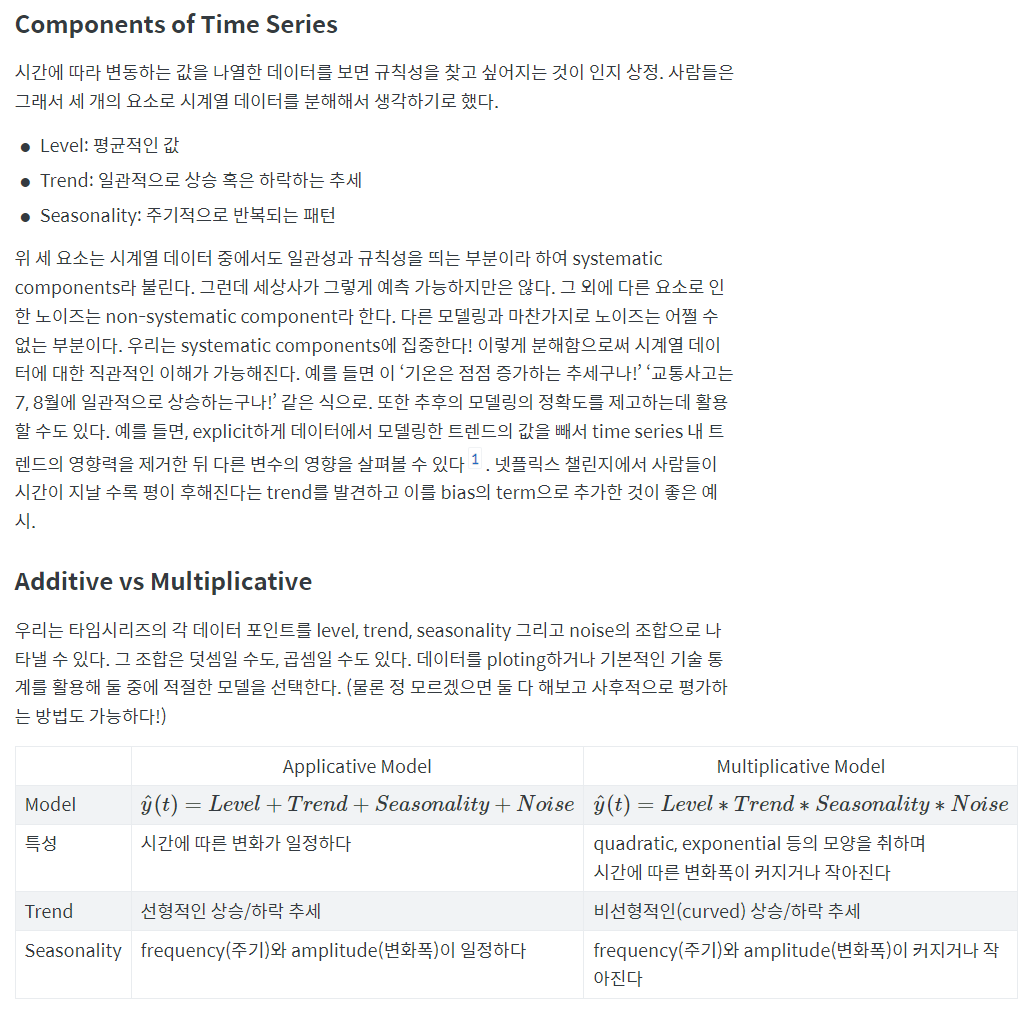

In [9]:
Image('images\\12.png')

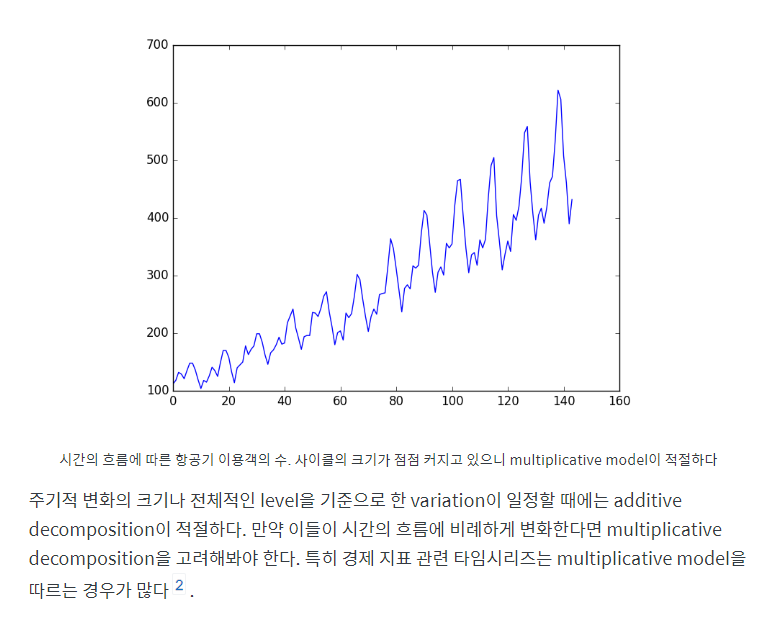

In [10]:
Image('images\\13.png')

# autocorrelation (stationarity check 1)

In [11]:
# If the time series is stationary, the ACF/PACF plots will show a quick cut off after a small number of lags.
# We don’t see that phenomenon here so we have somewhat an intuition that this series is not stationary.

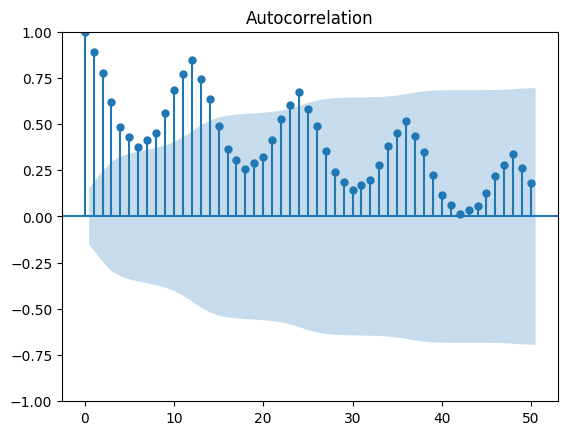

In [12]:
#stationarity check
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(data.production, lags=50)
plt.show()

c:\Users\SH\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


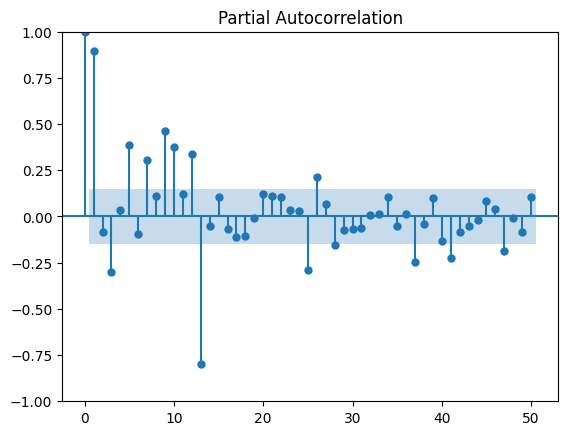

In [13]:
plot_pacf(data.production, lags=50)
plt.show()
#If the time series is stationary, the ACF/PACF plots will show a quick cut off after a small number of lags .
# We don’t see that phenomenon here so we have somewhat an intuition that this series is not stationary.

# dickey-fuller test (stationary check 2)

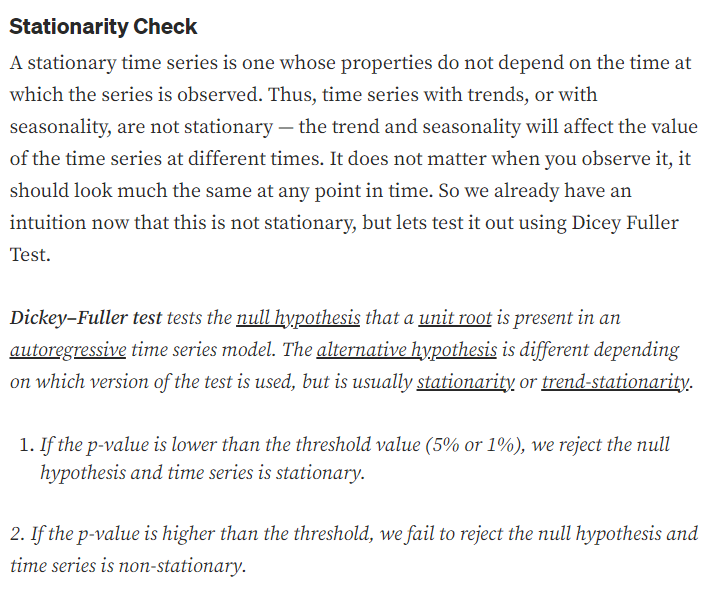

In [14]:
#stationarity check2
#Dickey–Fuller test tests the null hypothesis that a unit root is present in an autoregressive time series model.
from IPython.display import Image
Image('D:\econometrics\images\\1.png')

In [15]:
result = smt.adfuller(data.production)

In [16]:
result

(-1.3038115874221263,
 0.6274267086030331,
 13,
 154,
 {'1%': -3.473542528196209,
  '5%': -2.880497674144038,
  '10%': -2.576878053634677},
 1115.1730447395112)

In [17]:
result = smt.adfuller(data.production)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Test Statistics Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.303812
p-value: 0.627427
Critical Test Statistics Values:
	1%: -3.474
	5%: -2.880
	10%: -2.577


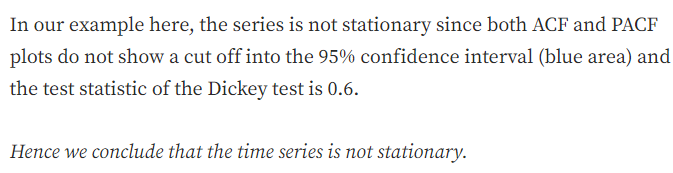

In [18]:
#stationarity check2
from IPython.display import Image
Image('D:\econometrics\images\\2.png')

# differencing for stationarity

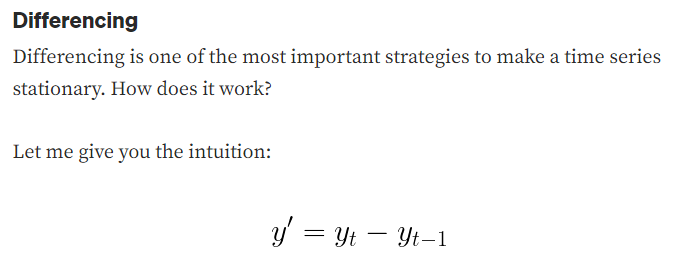

In [19]:
#differencing
from IPython.display import Image
Image('D:\econometrics\images\\3.png')

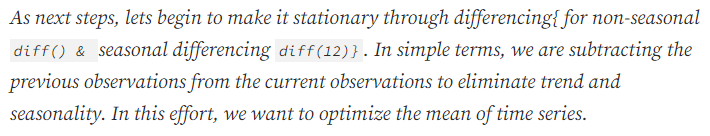

In [20]:
#differencing
from IPython.display import Image
Image('D:\econometrics\images\\4.png')

In [21]:
data['diff'] = data.production.diff().diff(12)

In [22]:
data2 = data['diff'].dropna()

In [23]:
data2.reset_index(inplace=True, drop=True)

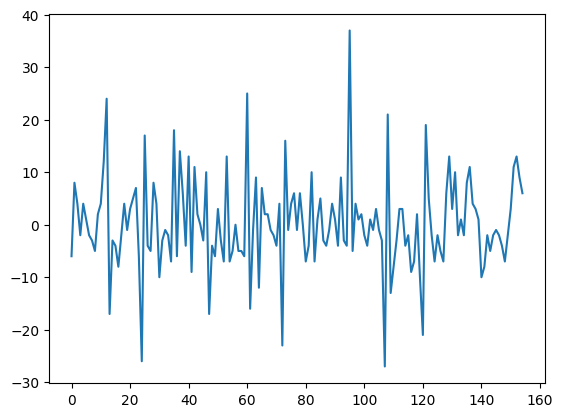

In [24]:
plt.plot(data2)

In [25]:
smt.adfuller(data2)

(-5.038002274921985,
 1.86542343187882e-05,
 11,
 143,
 {'1%': -3.4769274060112707,
  '5%': -2.8819726324025625,
  '10%': -2.577665408088415},
 980.3420381538448)

In [26]:
#stationarity confirmed
result = smt.adfuller(data2)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Test Statistics Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -5.038002
p-value: 0.000019
Critical Test Statistics Values:
	1%: -3.477
	5%: -2.882
	10%: -2.578


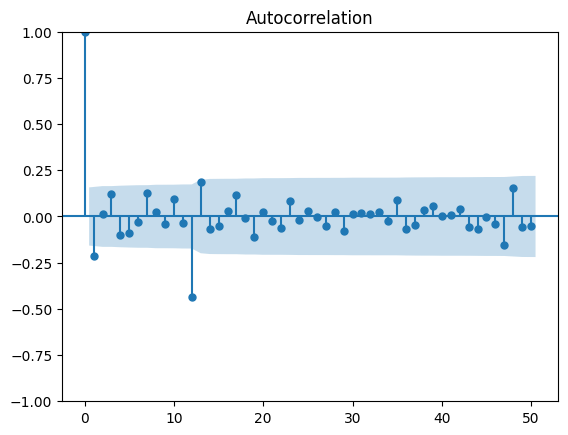

In [27]:
#stationarity confirmed
plot_acf(data2, lags=50)
plt.show()

c:\Users\SH\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


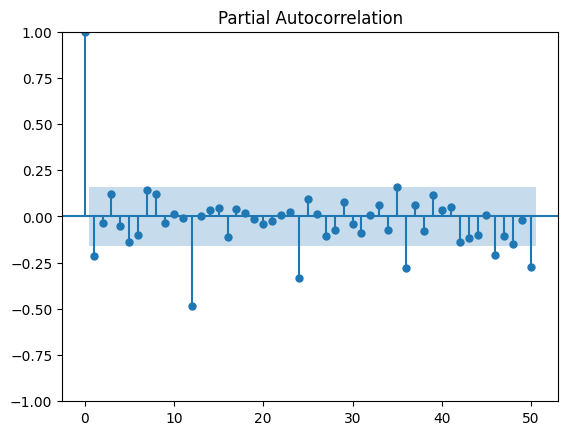

In [28]:
#stationarity confirmed
plot_pacf(data2, lags=50)
plt.show()

# modeling

In [29]:
# Seasonal ARIMA (SARIMA) on the other hand is denoted as (p, d, q)(P, D, Q)m 
# where (P, D, Q)m are the additional set of parameters that specifically describe the seasonal components of the model. 
# P, D, and Q represent the seasonal regression, differencing, and moving average coefficients, 
# and m represents the number of data points in each seasonal cycle.

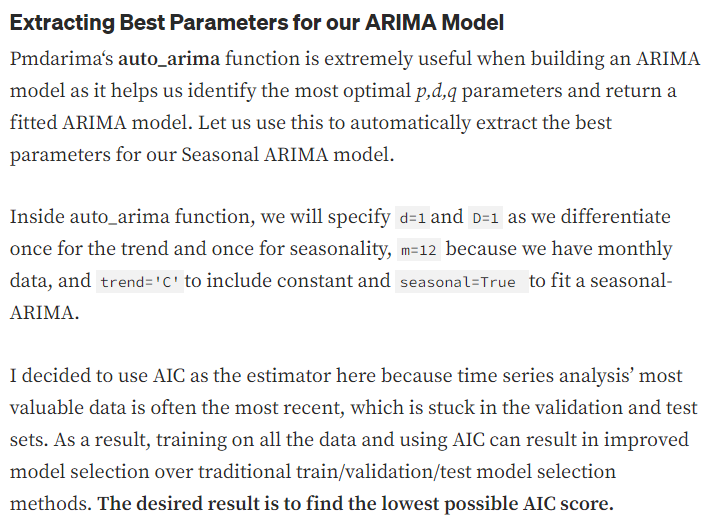

In [30]:
#앞에서 본 differencing (once for trend, once for seasonality)을 통한 stationarity를 위해 
# d=1, D=1 (once for trend and once for seasonality)로 설정
from IPython.display import Image
Image('D:\econometrics\images\\5.png')

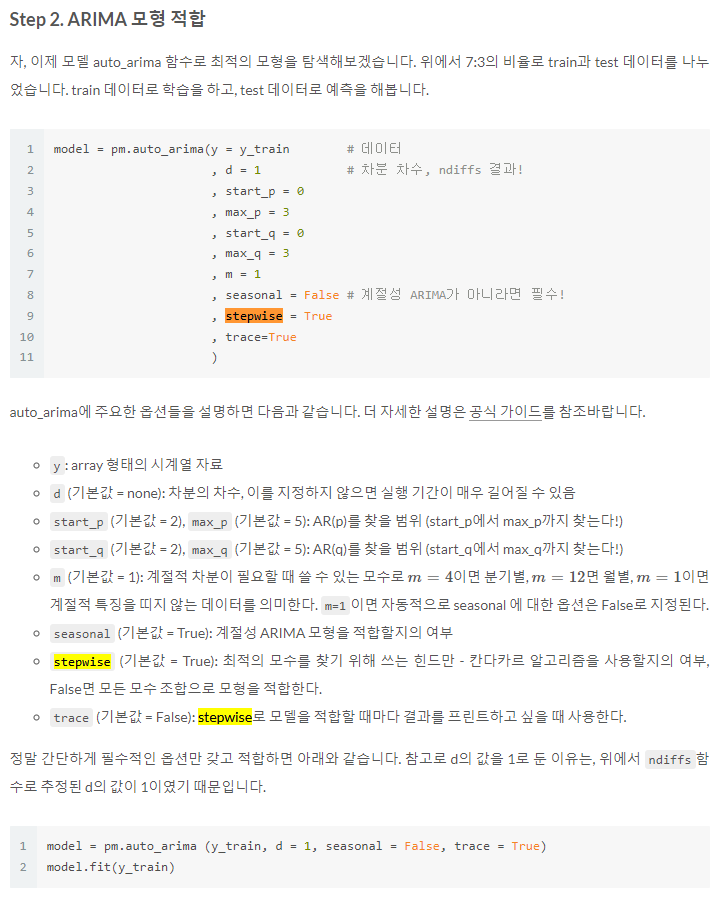

In [31]:
from IPython.display import Image
Image('D:\econometrics\images\\6.png')

# AIC 기준으로 best model 선정

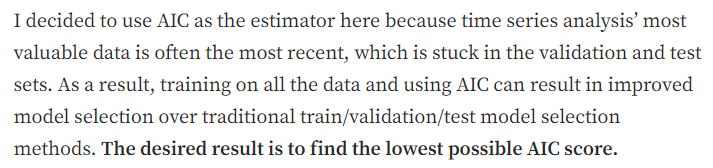

In [32]:
Image('images\\11.png')

# auto arima로 optimal p,d,q parameter 선정 (AIC 기준)

In [33]:
import pmdarima as pm
model = pm.auto_arima(y=data.production, d=1, D=1, seasonal=True, m=12, trend='c',\
    start_p=0, start_q=0, max_order=6, test='adf', stepwise=True, trace=True)
print(model.summary())
#Output exceeds the size limit. Open the full output data in a text editor
#text editor 눌러보면 best model 나옴

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=1076.128, Time=0.12 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1121.939, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1083.569, Time=0.14 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1068.286, Time=0.15 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=1116.950, Time=0.03 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=1070.017, Time=0.19 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=1069.963, Time=0.50 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1084.109, Time=0.14 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=inf, Time=1.22 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=1074.277, Time=0.10 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=1070.056, Time=0.20 sec
 ARIMA(0,1,2)(0,1,1)[12]             : AIC=1069.791, Time=0.16 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=1068.200, Time=0.11 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1116.800, Time=0.03 sec
 ARIMA(1,1,0)(1,1,1)[12]

In [34]:
#Summary : AIC score is obtained when the parameters equal to (1, 1, 0)(0, 1, 1, 12).

In [35]:
#train test split
train = data.production[:int(0.85*(len(data.production)))]
test = data.production[int(0.85*(len(data.production))):]

<AxesSubplot: >

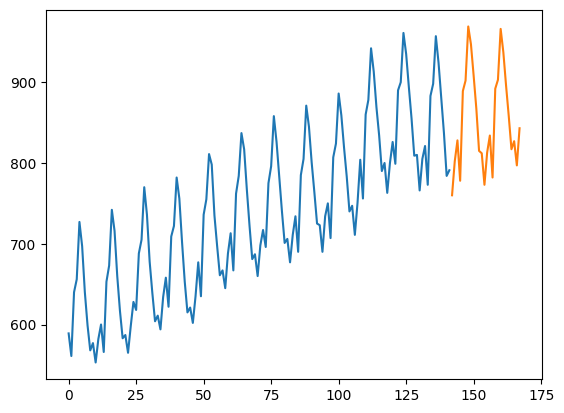

In [36]:
train.plot()
test.plot()

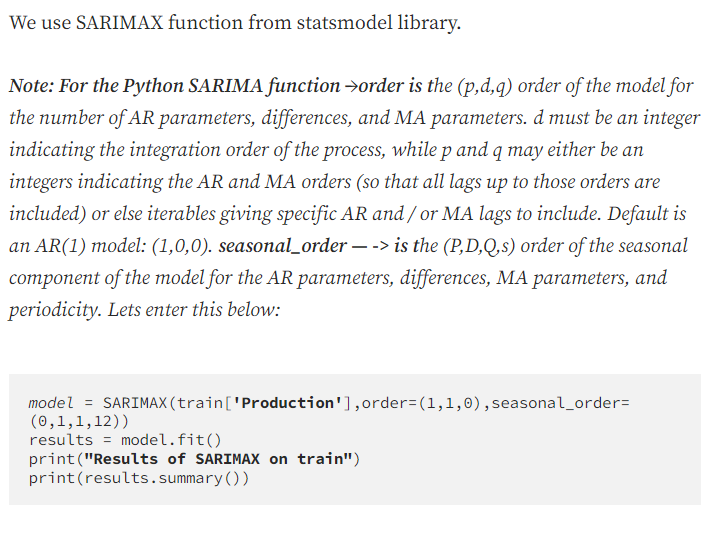

In [37]:
Image('images\\7.png')

# statsmodels SARIMAX

In [38]:
result = smt.SARIMAX(train, order=(1,1,0), seasonal_order=(0,1,1,12)).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                           production   No. Observations:                  142
Model:             SARIMAX(1, 1, 0)x(0, 1, [1], 12)   Log Likelihood                -445.603
Date:                              Sun, 04 Dec 2022   AIC                            897.205
Time:                                      15:48:16   BIC                            905.785
Sample:                                           0   HQIC                           900.691
                                              - 142                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2728      0.087     -3.149      0.002      -0.443      -0.103
ma.S.L12      -0.6158      0.086     -7.163      0.000      -0.784      -0.447
sigma2        56.0243      5.765      9.719      0.000      44.726      67.323
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):                40.04
Prob(Q):                              0.78   Prob(JB):                         0.00
Heteroskedasticity (H):               1.12   Skew:                             0.86
Prob(H) (two-sided):                  0.71   Kurtosis:                         5.12
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [39]:
# From the summary above, we can find the value of the coefficients and their p-value. 
# Notice that from the p-value, all coefficients are significant.

# VALIDATION (study the residuals)

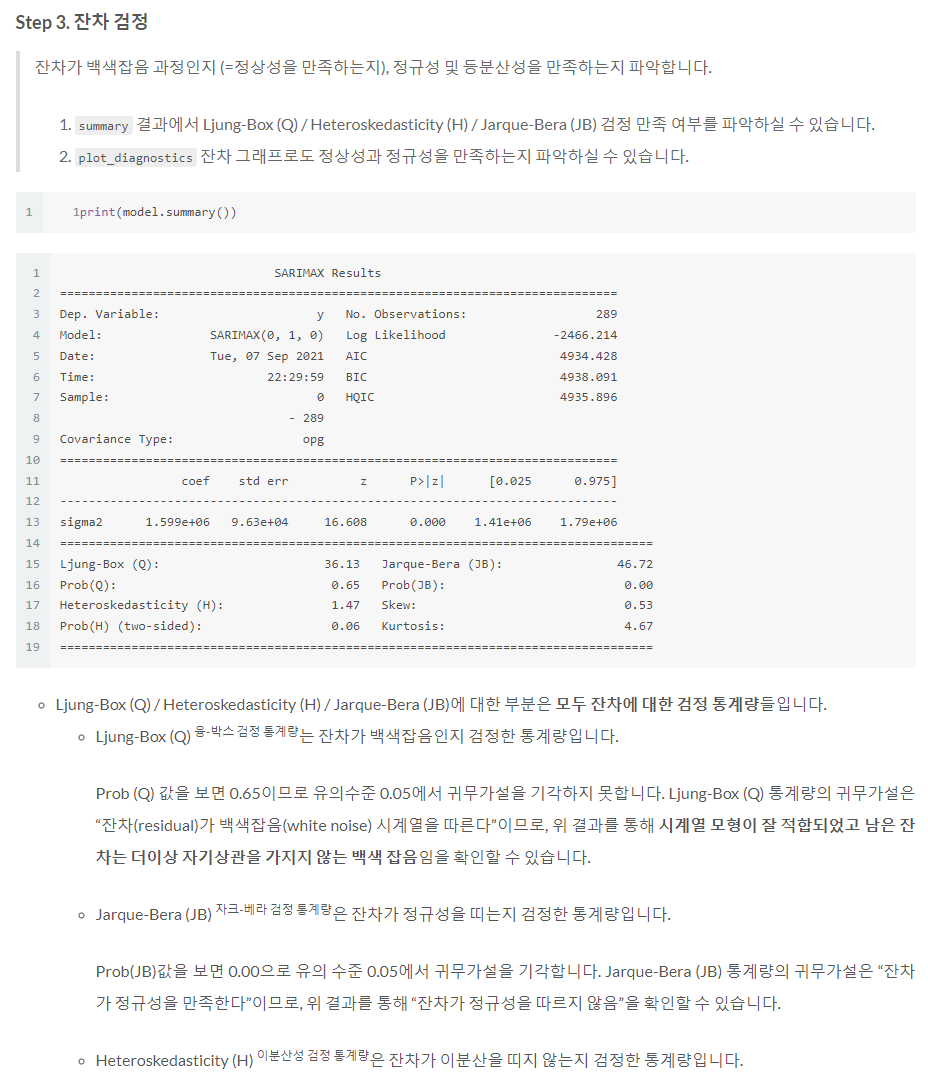

In [40]:
Image('images\\15.png')

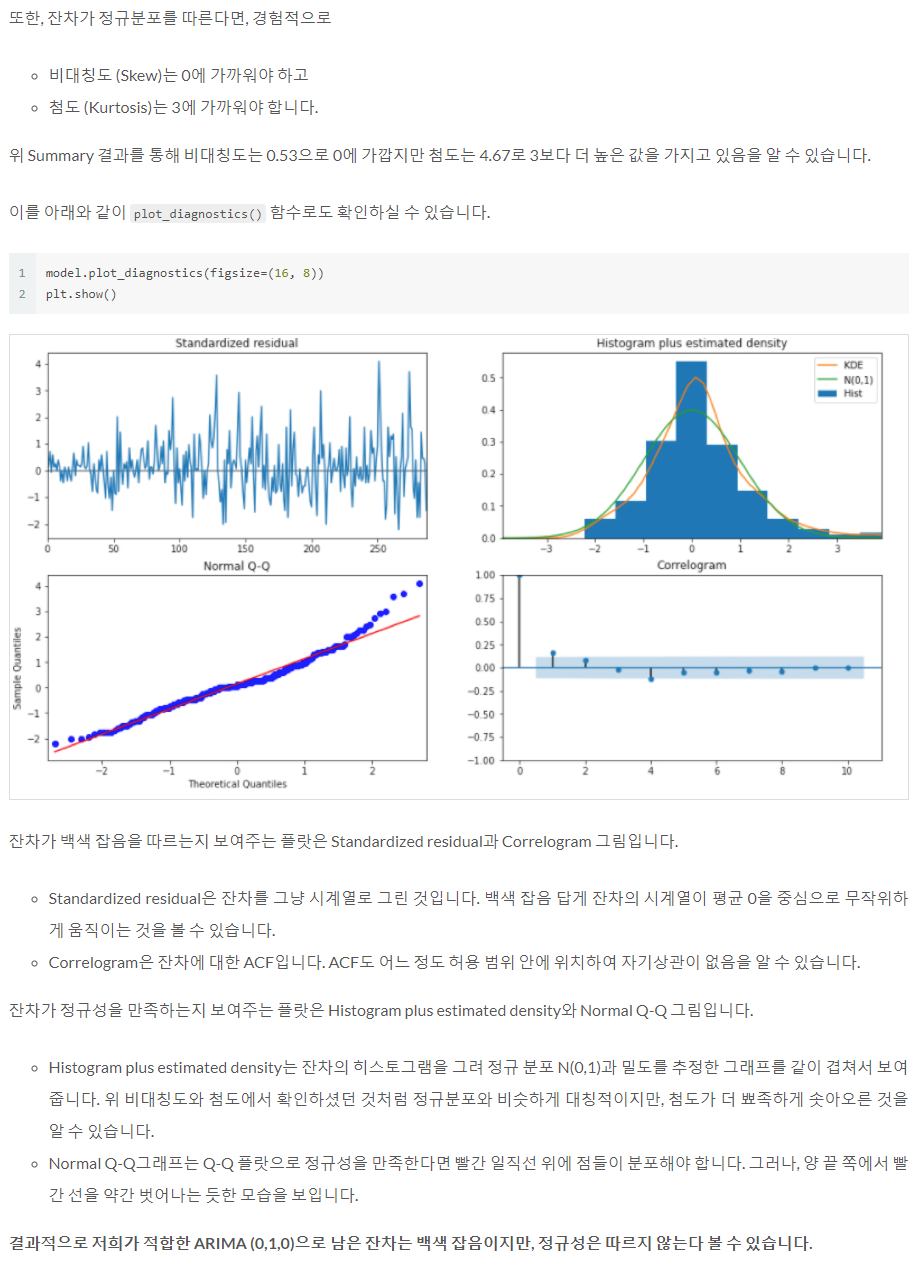

In [41]:
Image('images\\16.png')

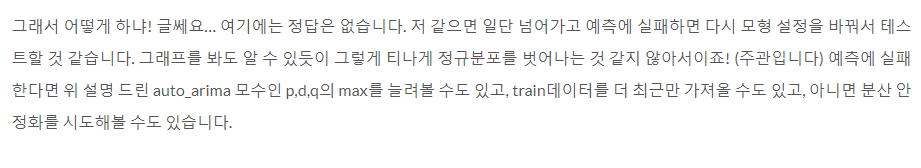

In [42]:
Image('images\\17.png')

In [43]:
# white noise 검정

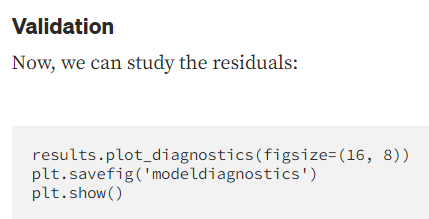

In [44]:
Image('images\\8.png')

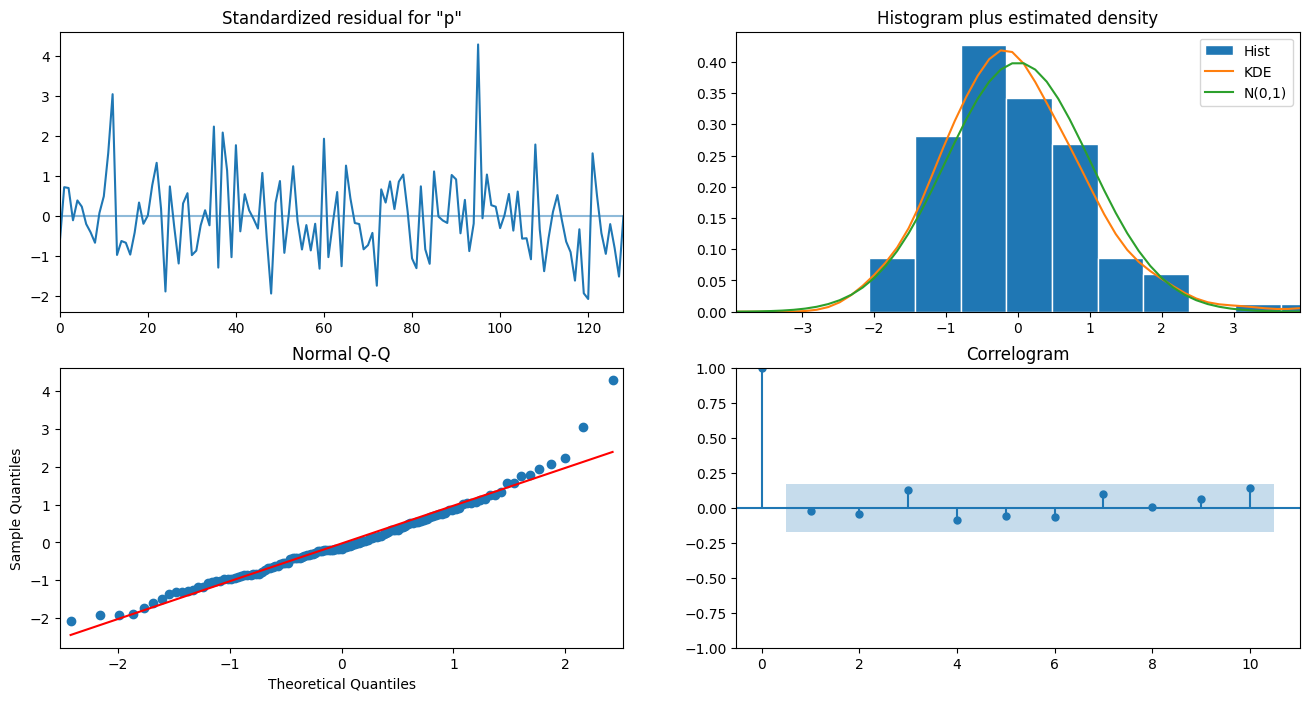

In [45]:
result.plot_diagnostics(figsize=(16,8))
plt.savefig('modeldiagnostics')
plt.show()
# 1. QQplot: normality 검정 (통과)
# 2. Correlogram: no autocorrelation in the residuals 
#                   thus effectively white-noise (통과)
# 3. 왼쪽상단 그래프: residuals over time (no seasonality detected) - good
# 4. 오른쪽상단 그래프: kde line closely follows N(0,1) line: residuals are normally distributed (통과)

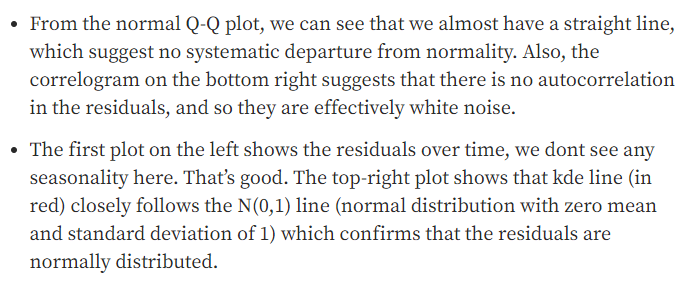

In [46]:
Image('images\\9.png')

# Accuracy of the forecasts

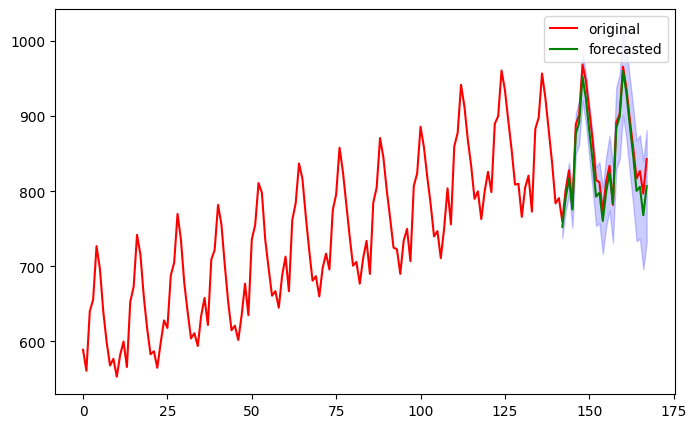

In [47]:
#checking prediction value with test
forecast = result.get_forecast(steps=len(test))
mean = forecast.predicted_mean
conf_int = forecast.conf_int()

d = mean.index
plt.figure(figsize=(8,5))

#plot past levels
plt.plot(data.production.index, data.production, label='original', color='red')

#prediction mean
plt.plot(d, mean, label='forecasted', color='green')

#shade of space between confidence intervals
plt.fill_between(d, conf_int.iloc[:,0], conf_int.iloc[:,1], alpha=0.2, color='blue')

#plot legend
plt.legend()
plt.savefig('p')
plt.show()

# score

In [48]:
from sklearn.metrics import r2_score
import numpy as np
print('R2score is',r2_score(test, mean))
mean_absolute_percentage_error = np.mean(np.abs(mean - test)/np.abs(test))*100
print('MAPE(Mean Absolute Percentage Error) is', mean_absolute_percentage_error)

R2score is 0.9240433679738146
MAPE(Mean Absolute Percentage Error) is 1.6499054757995684


# Forecasting

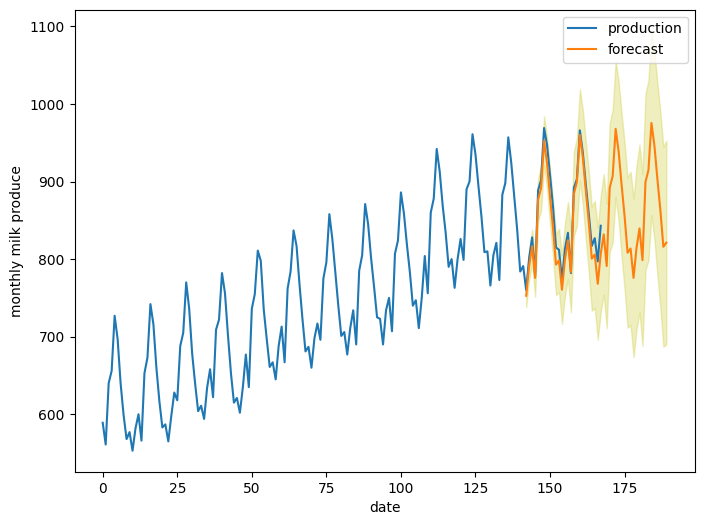

In [49]:
#forecast for the next 48 months
future = result.get_forecast(steps=48)
ci = future.conf_int()
ax = data.production.plot(label='production', figsize=(8,6))
future.predicted_mean.plot(ax=ax, label='forecast')
ax.fill_between(ci.index,\
    ci.iloc[:,0],
    ci.iloc[:,1],
    color='y', alpha=0.25)
ax.set_xlabel('date')
ax.set_ylabel('monthly milk produce')
plt.legend()
plt.show()

168


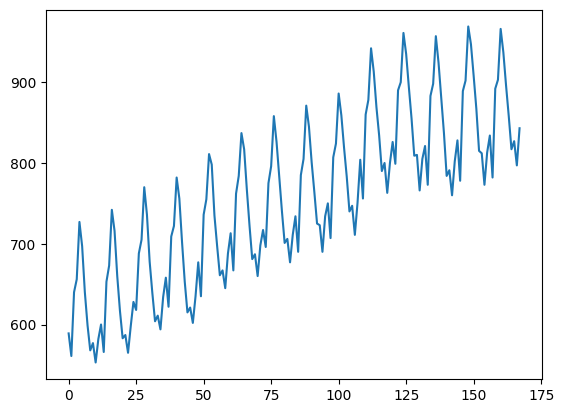

In [50]:
#원본데이터
print(len(data.production))
data.production.plot()
plt.show()